# 딥러닝 모델

In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import shutil
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

In [2]:
df = pd.read_csv("../data/real_final.csv")

In [3]:
print(df.isnull().sum())

GameDate              0
home_Team             0
away_Team             0
Result                0
home_Recent_5_Win     0
home_Recent_5_Loss    0
home_OPS              0
home_BB               0
home_HBP              0
home_SO               0
home_ERA              0
home_BB_p             0
home_K                0
home_IR               0
home_IS               0
home_TBF              0
away_OPS              0
away_BB               0
away_HBP              0
away_SO               0
away_ERA              0
away_BB_p             0
away_K                0
away_IR               0
away_IS               0
away_TBF              0
dtype: int64


결측치가 없으므로 바로 진행

In [4]:
# feature와 label 나누기
X = df.drop(columns=['Result']) 
y = df['Result']

In [5]:
scaler = StandardScaler()

# 제외할 컬럼 따로 빼두기
exclude_columns = ['GameDate', 'home_Team', 'away_Team']

# 정규화할 대상만 선택
X_to_scale = X.drop(columns=exclude_columns)
X_scaled_part = pd.DataFrame(scaler.fit_transform(X_to_scale), columns=X_to_scale.columns)

# 정규화 안 한 컬럼 붙이기, 'GameDate' 컬럼 삭제 
X_scaled = pd.concat([X[exclude_columns].reset_index(drop=True), X_scaled_part], axis=1)
X_scaled = X_scaled.drop(columns=['GameDate'])

X_scaled

,home_Team,away_Team,home_Recent_5_Win,home_Recent_5_Loss,home_OPS,home_BB,home_HBP,home_SO,home_ERA,home_BB_p,...,away_OPS,away_BB,away_HBP,away_SO,away_ERA,away_BB_p,away_K,away_IR,away_IS,away_TBF
0,3,2,-1.125309,-1.990694,1.368628,0.330363,1.921742,0.561159,-2.127890,-2.457667,...,-0.388212,-2.451854,0.663119,-2.984969,0.660814,0.270070,0.584483,2.005235,1.109479,-1.285644
1,1,2,-1.950661,-1.990694,0.440944,-1.532272,-0.695171,-2.999912,-2.127890,-0.595675,...,-0.704716,-0.629167,-0.689573,-0.854284,1.341422,1.164247,-0.170138,2.005235,1.970567,-0.463439
2,3,0,-1.950661,-1.990694,-1.423260,1.261680,0.613285,-0.151055,-1.820009,-0.595675,...,0.184287,-0.629167,0.663119,-0.854284,-0.022819,-1.518284,-3.188623,0.027398,0.248391,-2.518951
3,5,6,-1.950661,-1.990694,-0.659025,-0.600955,-0.695171,0.561159,-0.896363,-2.457667,...,-1.686807,1.193519,0.663119,1.986629,-0.857698,-0.624107,-0.924760,-0.467061,-0.612697,-1.696746
4,7,8,-1.950661,-1.990694,-1.387919,-0.600955,-0.695171,-0.863270,-1.512127,1.266318,...,-1.589064,1.193519,-0.689573,1.276401,-2.140266,0.270070,2.093726,-0.467061,-0.612697,-1.696746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,3,1,-0.299957,0.472318,-1.741323,-1.718536,-0.695171,-0.293498,0.883194,0.707720,...,-0.202034,0.828982,0.663119,0.424127,-0.354351,-0.266436,-1.377532,-0.467061,-0.612697,-1.121203
3064,8,2,0.525395,-0.348686,-0.208435,-0.973482,0.613285,-0.578384,-1.030599,-0.409475,...,0.961582,-0.082362,-0.689573,0.282081,-1.293287,-1.160613,0.282635,1.016317,-0.612697,-0.874542
3065,4,5,0.525395,-0.348686,-0.155425,0.144099,-0.695171,1.558259,1.099943,1.266318,...,-0.532501,1.922594,0.663119,0.282081,-0.279332,-0.445272,0.886332,1.016317,1.109479,-0.381219
3066,9,6,-0.299957,0.472318,1.956161,-1.532272,3.230198,-0.435941,1.598712,2.755912,...,-0.360285,-0.082362,0.663119,-0.570193,-0.811719,-1.160613,-0.622911,2.499694,5.414919,-0.956762


In [6]:
# 제외할 컬럼
exclude_columns = ['GameDate', 'home_Team', 'away_Team']

# 1. 정규화 대상만 선택
X_to_scale = X.drop(columns=exclude_columns)
X_scaled_part = pd.DataFrame(
    StandardScaler().fit_transform(X_to_scale),
    columns=X_to_scale.columns
)

# 2. 원-핫 인코딩 (prefix로 home/away 구분!)
team_encoded = pd.get_dummies(
    X[['home_Team', 'away_Team']].reset_index(drop=True),
    columns=['home_Team', 'away_Team'],
    prefix=['home_Team', 'away_Team']
).astype(int)

# 3. 정규화된 수치 + 인코딩된 팀 정보 결합
X_scaled = pd.concat([X_scaled_part.reset_index(drop=True), team_encoded], axis=1)


In [7]:
X_scaled

,home_Recent_5_Win,home_Recent_5_Loss,home_OPS,home_BB,home_HBP,home_SO,home_ERA,home_BB_p,home_K,home_IR,...,away_Team_0,away_Team_1,away_Team_2,away_Team_3,away_Team_4,away_Team_5,away_Team_6,away_Team_7,away_Team_8,away_Team_9
0,-1.125309,-1.990694,1.368628,0.330363,1.921742,0.561159,-2.127890,-2.457667,-3.130506,-0.973348,...,0,0,1,0,0,0,0,0,0,0
1,-1.950661,-1.990694,0.440944,-1.532272,-0.695171,-2.999912,-2.127890,-0.595675,-0.889886,0.466031,...,0,0,1,0,0,0,0,0,0,0
2,-1.950661,-1.990694,-1.423260,1.261680,0.613285,-0.151055,-1.820009,-0.595675,-0.889886,0.945824,...,1,0,0,0,0,0,0,0,0,0
3,-1.950661,-1.990694,-0.659025,-0.600955,-0.695171,0.561159,-0.896363,-2.457667,-1.636759,-0.973348,...,0,0,0,0,0,0,1,0,0,0
4,-1.950661,-1.990694,-1.387919,-0.600955,-0.695171,-0.863270,-1.512127,1.266318,2.097607,-0.493555,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3063,-0.299957,0.472318,-1.741323,-1.718536,-0.695171,-0.293498,0.883194,0.707720,-0.889886,-0.493555,...,0,1,0,0,0,0,0,0,0,0
3064,0.525395,-0.348686,-0.208435,-0.973482,0.613285,-0.578384,-1.030599,-0.409475,-0.143013,0.945824,...,0,0,1,0,0,0,0,0,0,0
3065,0.525395,-0.348686,-0.155425,0.144099,-0.695171,1.558259,1.099943,1.266318,0.603860,-0.013762,...,0,0,0,0,0,1,0,0,0,0
3066,-0.299957,0.472318,1.956161,-1.532272,3.230198,-0.435941,1.598712,2.755912,-1.935508,1.905409,...,0,0,0,0,0,0,1,0,0,0


In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=3, stratify= y
)

In [9]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2454, 42), (614, 42), (2454,), (614,))

In [10]:
# 모델 삭제 코드
shutil.rmtree("kbo_dl_best")

FileNotFoundError: [WinError 3] 지정된 경로를 찾을 수 없습니다: 'kbo_dl_best'

In [11]:
import tensorflow as tf
from tensorflow.keras import layers
import keras_tuner as kt

def build_model(hp):
    model = tf.keras.Sequential()
    model.add(layers.Dense(
        hp.Int('units1', min_value=32, max_value=256, step=32),
        activation='relu',
        input_shape=(X_train.shape[1],)))
    model.add(layers.Dropout(hp.Float('dropout1', 0.1, 0.5, step=0.1)))
    
    model.add(layers.Dense(
        hp.Int('units2', min_value=16, max_value=128, step=16),
        activation=hp.Choice('activation2', ['relu', 'tanh'])))
    model.add(layers.Dropout(hp.Float('dropout2', 0.1, 0.5, step=0.1)))

    model.add(layers.Dense(1, activation='sigmoid'))

    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Float('lr', 1e-4, 1e-3, sampling='log')),
        loss='binary_crossentropy',
        metrics=['accuracy'])

    return model


In [12]:
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=80,  
    executions_per_trial=1,
    project_name='kbo_dl_best'
)

tuner.search(
    X_train, y_train,
    epochs=50,
    validation_split=0.2,
    callbacks=[tf.keras.callbacks.EarlyStopping(patience=5, restore_best_weights=True)]
)


Trial 80 Complete [00h 00m 06s]
val_accuracy: 0.8798370957374573

Best val_accuracy So Far: 0.8879836797714233
Total elapsed time: 00h 11m 40s


In [13]:
best_model = tuner.get_best_models(num_models=1)[0]
best_hps = tuner.get_best_hyperparameters(1)[0]

print("최적의 하이퍼파라미터:")
print(f"units1: {best_hps.get('units1')}")
print(f"dropout1: {best_hps.get('dropout1')}")
print(f"units2: {best_hps.get('units2')}")
print(f"activation2: {best_hps.get('activation2')}")
print(f"dropout2: {best_hps.get('dropout2')}")
print(f"lr: {best_hps.get('lr')}")

최적의 하이퍼파라미터:
units1: 256
dropout1: 0.2
units2: 16
activation2: tanh
dropout2: 0.5
lr: 0.00013236325964295176


c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\keras\src\layers\core\dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
c:\Users\82109\Documents\GitHub\KBO_Prediction_ML\KBO_DL_env\lib\site-packages\keras\src\saving\saving_lib.py:802: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 14 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


위에까지가 최적의 파라미터를 찾는 과정 
밑에가 최적의 파라미터로 모델을 만들고 평가하는 과정

In [14]:
best_hps = tuner.get_best_hyperparameters()[0]

model = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(best_hps.get('units1'), activation='relu'),
    Dropout(best_hps.get('dropout1')),
    Dense(best_hps.get('units2'), activation=best_hps.get('activation2')),
    Dropout(best_hps.get('dropout2')),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=best_hps.get('lr')),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [15]:
# EarlyStopping 콜백 정의
early_stop = EarlyStopping(
    monitor='val_loss',    
    patience=5,            
    restore_best_weights=True 
)

# 학습
history = model.fit(
    X_train, y_train,
    epochs=100,             
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stop], 
    verbose=1
)


Epoch 1/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5463 - loss: 0.7140 - val_accuracy: 0.7312 - val_loss: 0.5910
Epoch 2/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6680 - loss: 0.6092 - val_accuracy: 0.8024 - val_loss: 0.5160
Epoch 3/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7418 - loss: 0.5351 - val_accuracy: 0.8473 - val_loss: 0.4617
Epoch 4/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7797 - loss: 0.4945 - val_accuracy: 0.8615 - val_loss: 0.4227
Epoch 5/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7933 - loss: 0.4600 - val_accuracy: 0.8656 - val_loss: 0.3917
Epoch 6/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8342 - loss: 0.4173 - val_accuracy: 0.8615 - val_loss: 0.3677
Epoch 7/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8401 - loss: 0.3907 - val_accuracy: 0.8676 - val_loss: 0.3497
Epoch 8/100
62/62 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8717 - loss: 0.3510 - val_accuracy: 0.8697 - v

In [16]:
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy:.4f}")

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8443 - loss: 0.3468 
Test Accuracy: 0.8681


In [17]:
y_proba = model.predict(X_test).ravel()
y_pred = (y_proba >= 0.5).astype(int)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, y_proba))
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

# Train/Test 비교
y_train_proba = model.predict(X_train).ravel()
y_train_pred = (y_train_proba >= 0.5).astype(int)

y_test_proba = model.predict(X_test).ravel()
y_test_pred = (y_test_proba >= 0.5).astype(int)

print("Train Accuracy:", accuracy_score(y_train, y_train_pred))
print("Test Accuracy :", accuracy_score(y_test, y_test_pred))
print("Train AUC:", roc_auc_score(y_train, y_train_proba))
print("Test AUC :", roc_auc_score(y_test, y_test_proba))

20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
Accuracy: 0.8680781758957655
AUC: 0.939688509263981
              precision    recall  f1-score   support

           0       0.87      0.85      0.86       296
           1       0.86      0.89      0.87       318

    accuracy                           0.87       614
   macro avg       0.87      0.87      0.87       614
weighted avg       0.87      0.87      0.87       614

[[251  45]
 [ 36 282]]
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
20/20 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 
Train Accuracy: 0.8981255093724532
Test Accuracy : 0.8680781758957655
Train AUC: 0.9647024550649682
Test AUC : 0.939688509263981


In [18]:
model.save('deep_learning_model.h5')

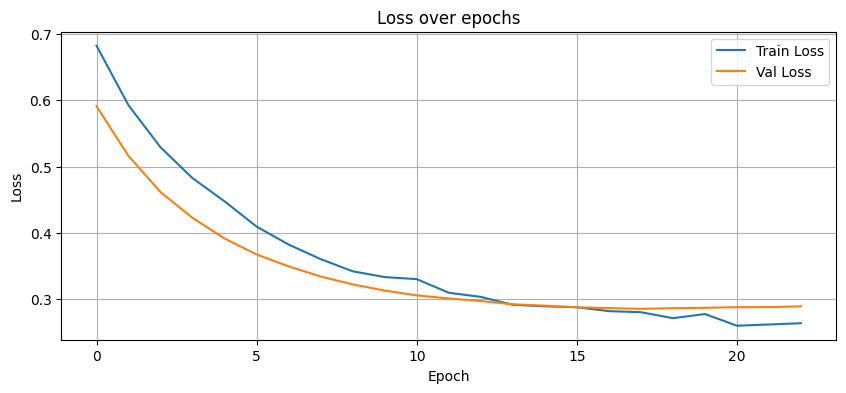

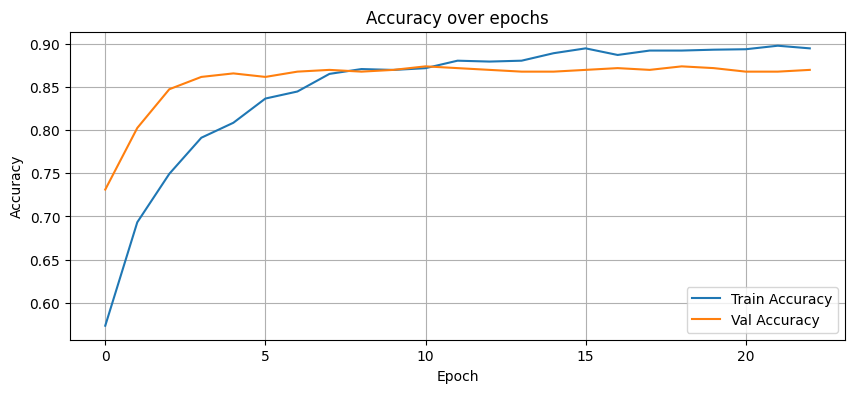

In [19]:
plt.figure(figsize=(10, 4))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 4))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.title('Accuracy over epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


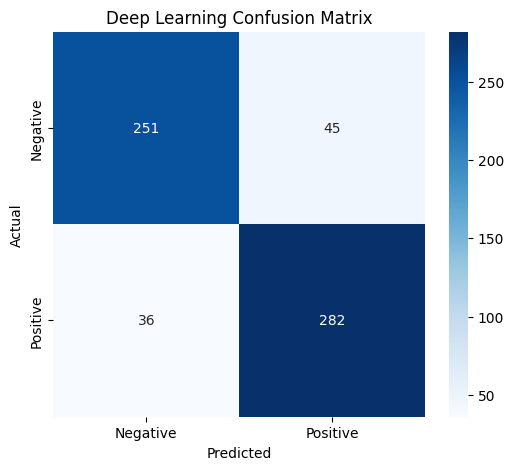

In [20]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Deep Learning Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


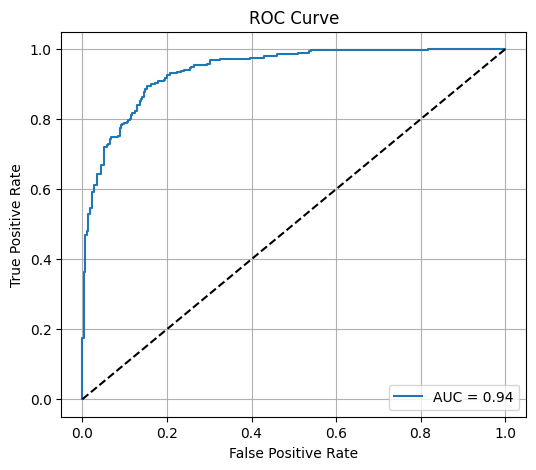

In [21]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()


In [22]:
X_train.to_csv('../models/X_train_deep.csv', index=False)